# Jayveersinh Raj
# Email: j.raj@innopolis.university
# Group: BS20-DS-01

## Downloading and unzipping the dataset from Roboflow

## 1. A Faster RCNN model using detectron2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DMnMDBHxlbzxZQ2mgWrQ")
project = rf.workspace("innopolis-university-oe28f").project("assignment_1_advanced_machine_learning")
dataset = project.version(10).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=74c9e40753261d41e089e6677a9e32770cf74c844affb7e2cac43d2def72a8f3
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Assignment_1_Advanced_Machine_Learning-10 in coco:: 100%|██████████| 248/248 [00:00<00:00, 382.44it/s]


In [ ]:
#@title Install dependencies
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=cf072c0e131eff216ae3bc2e1f0f7d9a94a99d6d1f9f0a66dc87296b612147fd
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 0.2.32 requires PyYAML>=5.3.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompati

### Installing detectron2

In [ ]:
#@title Install detectron2
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
!pip install -r requirements.txt
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git
"""
%cd /content/
!git clone https://github.com/facebookresearch/iopath
%cd /content/iopath
!python setup.py install

%cd /content/
!git clone https://github.com/WoLpH/portalocker
%cd /content/portalocker
!python setup.py install
"""

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 14867, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 14867 (delta 17), reused 26 (delta 10), pack-reused 14826
Receiving objects: 100% (14867/14867), 6.06 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (10759/10759), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running install
running bdist_egg
running egg_info
creating detectron2.egg-info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
writing manifest file 'detectron2.egg-info/SOURCES.txt'
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:476: UserWarning: Attempted to use 

'\n%cd /content/\n!git clone https://github.com/facebookresearch/iopath\n%cd /content/iopath\n!python setup.py install\n\n%cd /content/\n!git clone https://github.com/WoLpH/portalocker\n%cd /content/portalocker\n!python setup.py install\n'

### Reference used: 
[Link](https://blog.roboflow.com/how-to-train-detectron2/#using-your-own-data-with-detectron2)

## Importing necessary dependencies

In [ ]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.config import CfgNode as CN
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode, Visualizer

### Because Detectron2 holds a registry of accessible datasets, we must register our custom data with it before it can be used for training.

In [ ]:
register_coco_instances("train_dataset", {}, "/content/Assignment_1_Advanced_Machine_Learning-10/train/_annotations.coco.json", "/content/Assignment_1_Advanced_Machine_Learning-10/train")
register_coco_instances("val_dataset", {}, "/content/Assignment_1_Advanced_Machine_Learning-10/valid/_annotations.coco.json", "/content/Assignment_1_Advanced_Machine_Learning-10/valid")
register_coco_instances("test_dataset", {}, "/content/Assignment_1_Advanced_Machine_Learning-10/test/_annotations.coco.json", "/content/Assignment_1_Advanced_Machine_Learning-10/test")

### Detectron2 allows us to easily check our training data to ensure that it has been loaded correctly. We do it in the following ways:

WARNING [03/06 19:13:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/06 19:13:42 d2.data.datasets.coco]: Loaded 210 images in COCO format from /content/Assignment_1_Advanced_Machine_Learning-10/train/_annotations.coco.json


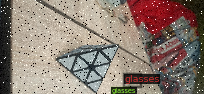

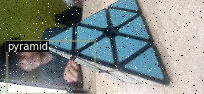

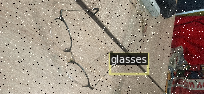

In [ ]:
#visualize training data
import cv2
from google.colab.patches import cv2_imshow
train_dataset_metadata = MetadataCatalog.get("train_dataset")
dataset_dicts = DatasetCatalog.get("train_dataset")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_dataset_metadata, scale=0.1)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### custom training configuration

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (800, 1000)
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

cfg.TEST.EVAL_PERIOD = 500

### Before we begin training, we must ensure that the model validates against the validation set. Sadly, this is not the case by default.

### We can simply accomplish this by using the COCO Evaluator to define our own trainer based on the Default Trainer:

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/06 16:57:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[03/06 16:57:34 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)


[03/06 16:59:12 d2.utils.events]:  eta: 1:49:50  iter: 19  total_loss: 2.121  loss_cls: 1.41  loss_box_reg: 0.4617  loss_rpn_cls: 0.2123  loss_rpn_loc: 0.01776  time: 4.4604  last_time: 4.4428  data_time: 0.0729  last_data_time: 0.0434   lr: 1.0285e-06  max_mem: 12495M
[03/06 17:00:41 d2.utils.events]:  eta: 1:48:26  iter: 39  total_loss: 2.194  loss_cls: 1.389  loss_box_reg: 0.5036  loss_rpn_cls: 0.2161  loss_rpn_loc: 0.01568  time: 4.4566  last_time: 4.4412  data_time: 0.0361  last_data_time: 0.0483   lr: 1.0585e-06  max_mem: 12495M
[03/06 17:02:10 d2.utils.events]:  eta: 1:46:51  iter: 59  total_loss: 2.118  loss_cls: 1.358  loss_box_reg: 0.5607  loss_rpn_cls: 0.2247  loss_rpn_loc: 0.01886  time: 4.4531  last_time: 4.4413  data_time: 0.0296  last_data_time: 0.0243   lr: 1.0885e-06  max_mem: 12495M
[03/06 17:03:39 d2.utils.events]:  eta: 1:45:18  iter: 79  total_loss: 2.053  loss_cls: 1.326  loss_box_reg: 0.4395  loss_rpn_cls: 0.2307  loss_rpn_loc: 0.0183  time: 4.4526  last_time: 4.

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[03/06 17:34:50 d2.evaluation.evaluator]: Inference done 11/20. Dataloading: 0.0015 s/iter. Inference: 0.2569 s/iter. Eval: 0.0005 s/iter. Total: 0.2589 s/iter. ETA=0:00:02
[03/06 17:34:52 d2.evaluation.evaluator]: Total inference time: 0:00:04.023890 (0.268259 s / iter per device, on 1 devices)
[03/06 17:34:52 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.257649 s / iter per device, on 1 devices)
[03/06 17:34:52 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 17:34:52 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[03/06 17:34:52 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[03/06 17:34:52 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/06 17:34:52 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[03/06 17:34:52 d2.evaluation

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[03/06 18:12:00 d2.evaluation.evaluator]: Inference done 11/20. Dataloading: 0.0015 s/iter. Inference: 0.2583 s/iter. Eval: 0.0004 s/iter. Total: 0.2603 s/iter. ETA=0:00:02
[03/06 18:12:02 d2.evaluation.evaluator]: Total inference time: 0:00:04.154794 (0.276986 s / iter per device, on 1 devices)
[03/06 18:12:02 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.260539 s / iter per device, on 1 devices)
[03/06 18:12:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 18:12:02 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[03/06 18:12:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
[03/06 18:12:02 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/06 18:12:02 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[03/06 18:12:02 d2.evaluation

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[03/06 18:49:13 d2.evaluation.evaluator]: Inference done 11/20. Dataloading: 0.0012 s/iter. Inference: 0.2553 s/iter. Eval: 0.0004 s/iter. Total: 0.2569 s/iter. ETA=0:00:02
[03/06 18:49:15 d2.evaluation.evaluator]: Total inference time: 0:00:03.979697 (0.265313 s / iter per device, on 1 devices)
[03/06 18:49:15 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:03 (0.254621 s / iter per device, on 1 devices)
[03/06 18:49:15 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 18:49:15 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[03/06 18:49:15 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.41s)
creating index...
index created!
[03/06 18:49:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/06 18:49:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[03/06 18:49:16 d2.evaluation

### Running Detectron2 inference on test images

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.50
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("test_dataset", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "test_dataset")
inference_on_dataset(trainer.model, val_loader, evaluator)

[03/06 18:54:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
WARNING [03/06 18:54:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [03/06 18:54:56 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/06 18:54:56 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/Assignment_1_Advanced_Machine_Learning-10/test/_annotations.coco.json
[03/06 18:54:56 d2.data.build]: Distribution of instances among all 3 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| Glasses-and.. | 0            |  glasses   | 8            |  pyramid   | 1            |
|               |              |            |              |        

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[03/06 18:55:00 d2.evaluation.evaluator]: Total inference time: 0:00:01.474036 (0.294807 s / iter per device, on 1 devices)
[03/06 18:55:00 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.263533 s / iter per device, on 1 devices)
[03/06 18:55:00 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/06 18:55:00 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[03/06 18:55:00 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[03/06 18:55:00 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/06 18:55:00 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[03/06 18:55:00 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[03/06 18:55:00 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.01 seconds.
 Average Precision  (AP)

OrderedDict([('bbox',
              {'AP': 0.014877974296657687,
               'AP50': 0.048847389482781285,
               'AP75': 0.01998647069675912,
               'APs': nan,
               'APm': nan,
               'APl': 0.017702804343694707,
               'AP-Glasses-and-pyramid': nan,
               'AP-glasses': 0.029755948593315377,
               'AP-pyramid': 0.0})])

### As can be seen `mAP is nearly equal to 0.02 for glasses and 0.0 for pyramid`. The reason is that my pictures so many them had multiple annotations/objects, and there were very less singular object data/pictures. And also the size of the dataset by itself, there were not enough data for it to learn, and since I did not cut out separate images of objects, and most of them were very hard to cut of because of imposition on each other. And as it was seen the bounding boxes themselves were misarranged after getting the data with added noise by roboflow itself, but on roboflow they were perfect.

##2. YoloV8

### Installation

In [ ]:
# Pip install method (recommended)
!pip install -U torch==1.7 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install https://download.pytorch.org/whl/cu101/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu101/torch-1.7.0%2Bcu101-cp38-cp38-linux_x86_64.whl (735.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu116 requires torch==1.13.1, but you have torch 1.7.0+cu101 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.7.0+cu101 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.7.0+cu101 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publ

In [ ]:
!pip install --upgrade torchvision>=0.14.0

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

RuntimeError: ignored

### Getting the dataset from roboflow

In [2]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.7 MB/s eta 0:00:00


### Making datasets directory for the yolov8

In [2]:
import os
os.mkdir('datasets')

In [4]:
%cd /content/datasets

/content/datasets


In [5]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="DMnMDBHxlbzxZQ2mgWrQ")
project = rf.workspace("innopolis-university-oe28f").project("assignment_1_advanced_machine_learning")
dataset = project.version(14).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Assignment_1_Advanced_Machine_Learning-14 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 668.60it/s]


## Running YoloV8 for 20 epcohs

In [6]:
# The yolov8 model for 20 epochs
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Assignment_1_Advanced_Machine_Learning-14/data.yaml epochs=20 plots=True

100% 21.5M/21.5M [00:00<00:00, 245MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Assignment_1_Advanced_Machine_Learning-14/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

### The mAP can be seens as `0.08 for glasses, 0.18 for pyramid, 0.13 overall`, the reason as specified earlier. Smaller dataset for single classes, and mainly the annotation boxes generated after data augmentation fron roboflow, I tried changing them, but still they are imported mis placed

### Now lets see the plotting curves

### Confusion matrix

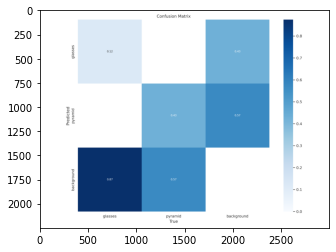

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
img_confusion_mat = Image.open("/content/datasets/runs/detect/train/confusion_matrix.png")
plt.imshow(img_confusion_mat)

### F1 curve, PR curve, P curve, R curve

In [21]:
img_f1 = Image.open("/content/datasets/runs/detect/train/F1_curve.png")
img_pr = Image.open("/content/datasets/runs/detect/train/PR_curve.png")
img_p = Image.open("/content/datasets/runs/detect/train/P_curve.png")
img_r = Image.open("/content/datasets/runs/detect/train/R_curve.png")

### F1 curve

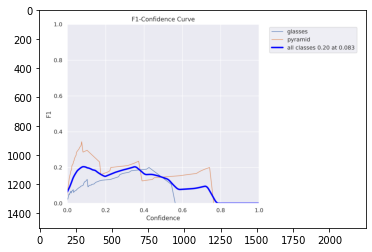

In [22]:
plt.imshow(img_f1)

### PR curve

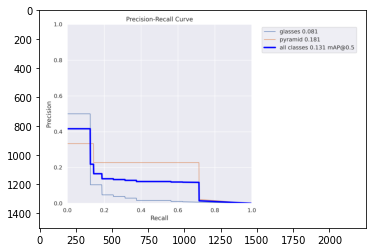

In [23]:
plt.imshow(img_pr)

### P curve

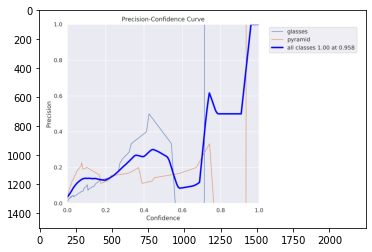

In [24]:
plt.imshow(img_p)

### R curve

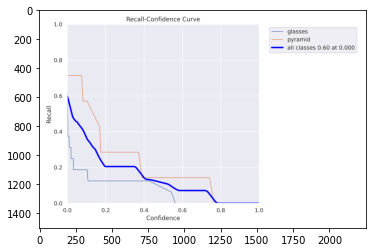

In [26]:
plt.imshow(img_r)

### Evaluation

In [27]:
!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt data=/content/datasets/Assignment_1_Advanced_Machine_Learning-14/data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Assignment_1_Advanced_Machine_Learning-14/valid/labels.cache... 20 images, 6 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.55it/s]
                   all         20         23      0.248      0.205      0.131     0.0527
               glasses         20         16       0.32      0.125     0.0813     0.0313
               pyramid         20          7      0.176      0.286      0.181     0.0741
Speed: 1.9ms pre-process, 6.9ms inference, 0.0ms loss, 1.4ms post-process per image


### The mAP can be seens as `0.08 for glasses, 0.18 for pyramid, and 0.13 overall`, the reason as specified earlier. Smaller dataset for single classes, and mainly the annotation boxes generated after data augmentation fron roboflow, I tried changing them, but still they are imported mis placed

## Comparison

### Mean Average Precision
- Faster RCNN: ~0.01%
- Yolov8: ~0.13%

## Speed:
Yolo is more speedier despite its size, and its speed has a number of advantages.
Yolo training takes 3 to 4 minutes for 24 epochs, but Faster RCNN (detectron2) takes more than an hour.

## Size:
Bigger RCNN model size: 805.5 Mb
The Yolov8 model size: 21.53 Mb